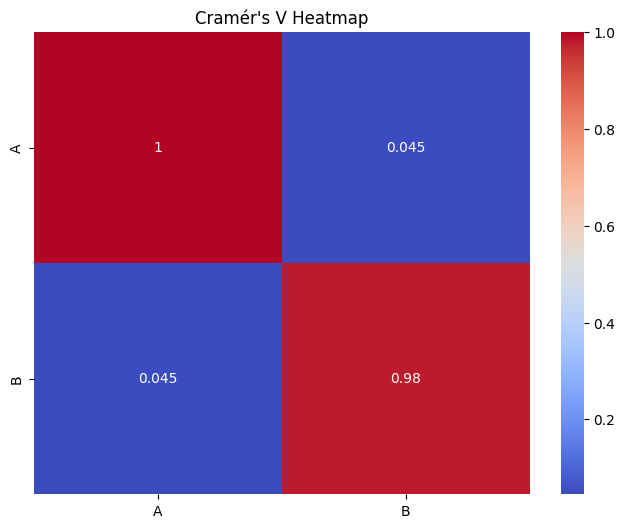

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Example data
data = pd.DataFrame({
    'A': np.random.choice(['X', 'Y', 'Z'], size=100),
    'B': np.random.choice(['M', 'N'], size=100)
})

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Calculate Cramér's V matrix
columns = data.columns
cramers_v_matrix = pd.DataFrame(index=columns, columns=columns)

for col1 in columns:
    for col2 in columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm')
plt.title("Cramér's V Heatmap")
plt.show()


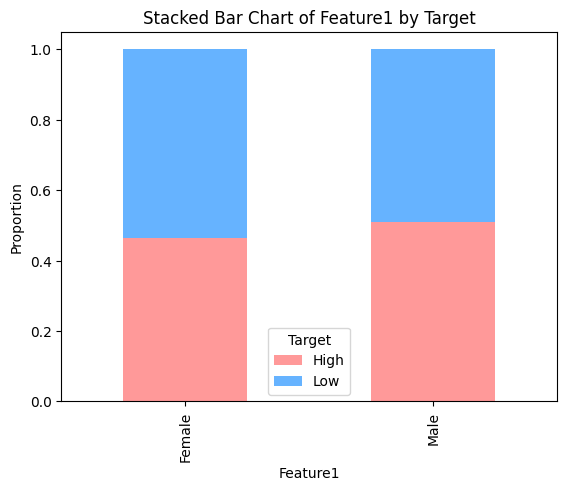

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x800 with 0 Axes>

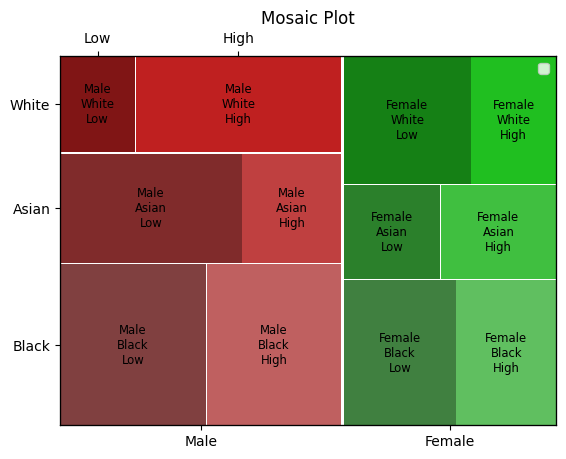

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Example DataFrame
data = pd.DataFrame({
    'Feature1': np.random.choice(['Male', 'Female'], size=100),
    'Feature2': np.random.choice(['White', 'Black', 'Asian'], size=100),
    'Target': np.random.choice(['High', 'Low'], size=100)
})

# Stacked Bar Chart
stacked_data = pd.crosstab(data['Feature1'], data['Target'], normalize='index')
stacked_data.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Stacked Bar Chart of Feature1 by Target')
plt.xlabel('Feature1')
plt.ylabel('Proportion')
plt.show()

# Mosaic Plot
plt.figure(figsize=(10, 8))
mosaic(data, ['Feature1', 'Feature2', 'Target'], title='Mosaic Plot')
# add legend
plt.legend(loc='upper right')
plt.show()
